# Previsão Idade Regressão

Neste notebook será levada uma abordagem diferente ao problema até aqui exposto. Neste decidimos, apesar de continuar a considerar este um problema de classifação, testar um modelo de regressão para a previsão de idade. 


Tal como nos notebooks passados, é preciso, numa fase inicial, carregar os dados dos ficheiros previamente criados. De seguida será feita a separação dos dados para treino/teste e por fim testar-se-á o sucesso da rede.


### Imports necessários

In [40]:
import tensorflow as tf
import pandas as pd
import numpy as np
import csv
from tensorflow.keras import layers
from tensorflow.keras import models
from PIL import Image

## Recuperação dos dados dos ficheiros relativamente as imagens/labels

Leitura do ficheiro csv correspondente a todas as labels e anexação destas a lista results

In [3]:
results = []
with open("5kLabelsNoBins.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_ALL) # change contents to floats
    for row in reader: # each row is a list
        results.append(row)

In [5]:
results

[['24'],
 ['38'],
 ['20'],
 ['21'],
 ['24'],
 ['53'],
 ['38'],
 ['32'],
 ['45'],
 ['60'],
 ['29'],
 ['34'],
 ['25'],
 ['46'],
 ['63'],
 ['23'],
 ['53'],
 ['27'],
 ['50'],
 ['26'],
 ['45'],
 ['26'],
 ['44'],
 ['43'],
 ['46'],
 ['25'],
 ['56'],
 ['39'],
 ['22'],
 ['52'],
 ['20'],
 ['28'],
 ['32'],
 ['48'],
 ['22'],
 ['49'],
 ['64'],
 ['32'],
 ['19'],
 ['30'],
 ['40'],
 ['43'],
 ['22'],
 ['24'],
 ['30'],
 ['40'],
 ['18'],
 ['57'],
 ['25'],
 ['25'],
 ['19'],
 ['41'],
 ['46'],
 ['23'],
 ['39'],
 ['24'],
 ['51'],
 ['25'],
 ['24'],
 ['55'],
 ['53'],
 ['47'],
 ['65'],
 ['41'],
 ['35'],
 ['40'],
 ['30'],
 ['48'],
 ['20'],
 ['36'],
 ['29'],
 ['27'],
 ['35'],
 ['45'],
 ['51'],
 ['28'],
 ['43'],
 ['18'],
 ['25'],
 ['28'],
 ['31'],
 ['43'],
 ['34'],
 ['20'],
 ['31'],
 ['21'],
 ['35'],
 ['22'],
 ['25'],
 ['34'],
 ['62'],
 ['32'],
 ['30'],
 ['26'],
 ['35'],
 ['33'],
 ['41'],
 ['30'],
 ['39'],
 ['52'],
 ['28'],
 ['27'],
 ['58'],
 ['19'],
 ['33'],
 ['23'],
 ['43'],
 ['25'],
 ['30'],
 ['45'],
 ['21'],
 

Nesta notebook, não se irá utilizar bins, visto que o iremos abordar como um problema de regressão. Deste modo preserva-se as labels como vieram (com a idade absoluta de cada pessoa)

Leitura do ficheiro relativo aos pontos das fotos
Neste caso foi utilizado o que possuia metade da informação do dataset (13877 fotos).
Este foi guardado em ficheiro binario por uma questão de redução de dimensao (uma vez que este contem 13877 * 256 * 256 floats)

In [2]:
teste = np.reshape(np.fromfile("5kDataNoBins"),(5642,256,256))

## Divisão dos dados para treino e teste

Uma vez que é necessária uma divisão do dataset para treino e teste, utilizamos o train_test_split com a flag de stratify (garantindo que a distribuição dos dados se mantem nas versões "reduzidas") e com random_state, permitindo assim que a operação se torna deterministica (os mesmos dados irao ser divididos sempre para os mesmos conjuntos de treino e teste, enquanto que o valor desta flag se mantenha constante)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(teste,results, test_size=0.15, stratify=results, random_state=2)

In [7]:
#Reshape para 4 dimensões (nFotos * 256pixeis * 256 pixeis * 1 canal de cor(black&white))
train_images = X_train.reshape((4795, 256, 256, 1))
test_images = X_test.reshape((847, 256, 256, 1))

Uma vez que agora é um problema de regressão em que iremos usar a idade absoluta, as labels deixam de ser one-hot-enconding(um array com a dimensão das classes) e passa a ser apenas o respetivo valor da idade. Deste modo as novas labels sao apenas um array com todas as idades dos dados

In [8]:
train_labels = np.asarray(y_train).astype('float32')
test_labels = np.asarray(y_test).astype('float32')

## Criação e treino da rede


Tendo todos os dados carregados e prontos para passar a rede, podemos seguir para a contrução e treino da mesma. Uma vez que esta é uma abordagem diferente, consideramos relevante a utilização de duas diferentes redes (de modo a melhor verificar a possibilidade de utilização destas). Inicialmente utilizamos uma rede mais simples para o processamento e posteriormente uma da api do KERAS, sendo assim mais complexa.

### Rede Simplificada


In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
dropout (Dropout)            (None, 125, 125, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 128)      

Definição das métricas do modelo, "standard" para este problema de regressão

In [20]:
model.compile(optimizer='rmsprop', loss='mean_absolute_percentage_error',metrics=['mse','mae'])

In [21]:
history = model.fit(train_images,train_labels, epochs=10, batch_size=16)

Epoch 1/10
300/300 [==============================] - 16s 53ms/step - loss: 33.3940 - mse: 291.4330 - mae: 12.7307
Epoch 2/10
300/300 [==============================] - 16s 52ms/step - loss: 27.7240 - mse: 206.3125 - mae: 10.8658
Epoch 3/10
300/300 [==============================] - 16s 52ms/step - loss: 26.9398 - mse: 200.1065 - mae: 10.6461
Epoch 4/10
300/300 [==============================] - 16s 52ms/step - loss: 26.6408 - mse: 197.8129 - mae: 10.5581
Epoch 5/10
300/300 [==============================] - 16s 52ms/step - loss: 26.4321 - mse: 193.9965 - mae: 10.4335
Epoch 6/10
300/300 [==============================] - 16s 52ms/step - loss: 26.0806 - mse: 187.1297 - mae: 10.2588
Epoch 7/10
300/300 [==============================] - 16s 52ms/step - loss: 25.5495 - mse: 178.8887 - mae: 10.0146
Epoch 8/10
300/300 [==============================] - 16s 52ms/step - loss: 25.2176 - mse: 169.6945 - mae: 9.7797
Epoch 9/10
300/300 [==============================] - 16s 53ms/step - loss: 24.69

In [22]:
test_loss,a,b = model.evaluate(test_images,test_labels)

27/27 [==============================] - 1s 33ms/step - loss: 24.8467 - mse: 185.7237 - mae: 10.1092


### ResNet50


Para a criação de uma rede ResNet é possível utilizar a API do Keras, passando como argumento os parametros mais importantes para a rede tais como:
   * include_top => inclusão de uma camada completamente conetada no topo da rede
   * weights => pesos relativos aos neuronios (neste caso começo aleatório, em vez de uso de uma rede pré-treinada)
   * input_tensor => utilização de um tensor do Keras para utilização de imagens (desnecessário para o problema em questão)
   * input_shape => formato do input à rede (tal como referido anteriormente (256,256,1) -> 256pixeis * 256pixeis *1 canal)


In [28]:
model_resnet = tf.keras.applications.ResNet50(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(256,256,1),
)

In [29]:
model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [30]:
x = layers.Flatten()(model_resnet.output)
x = layers.Dense(64, activation= 'relu')(x)
x = layers.Dense(1, activation= 'linear')(x)
resnet = models.Model(inputs = model_resnet.input, outputs = x)
resnet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

Definição das métricas do modelo, "standard" para este problema de regressão

In [32]:
resnet.compile(optimizer='rmsprop', loss='mean_absolute_percentage_error', metrics=['mse','mae'])

In [34]:
history2 = resnet.fit(train_images,train_labels, epochs=5, batch_size=16,validation_split=0.15)

Epoch 1/5
255/255 [==============================] - 63s 249ms/step - loss: 60.4515 - mse: 7915.1997 - mae: 20.2389 - val_loss: 27.1692 - val_mse: 245.6211 - val_mae: 11.5265
Epoch 2/5
255/255 [==============================] - 62s 244ms/step - loss: 28.9164 - mse: 226.3298 - mae: 11.3549 - val_loss: 29010.8047 - val_mse: 127560784.0000 - val_mae: 9264.8604
Epoch 3/5
255/255 [==============================] - 62s 244ms/step - loss: 27.9529 - mse: 213.8694 - mae: 11.0654 - val_loss: 28.3394 - val_mse: 160.2601 - val_mae: 10.1380
Epoch 4/5
255/255 [==============================] - 62s 244ms/step - loss: 27.8031 - mse: 214.6881 - mae: 11.0317 - val_loss: 26.4367 - val_mse: 224.4548 - val_mae: 11.0223
Epoch 5/5
255/255 [==============================] - 63s 248ms/step - loss: 27.5520 - mse: 215.5914 - mae: 11.0144 - val_loss: 35.6838 - val_mse: 246.6408 - val_mae: 12.3185


In [36]:
test_mape_resnet, test_mse_resnet, test_mae = resnet.evaluate(test_images,test_labels)

27/27 [==============================] - 3s 127ms/step - loss: 35.4821 - mse: 237.3293 - mae: 12.2140


## Sistema de Inferência por imagem de input

Tendo a rede definida e com este grau de taxa de sucesso, podemos passar a uma utilização mais prática da rede, onde é possivel carregar uma imagem local da máquina (que já se encontre em 256*256 pixeis) e testar a previsão da rede

No exemplo abaixo a pessoa da foto possuia 18 anos. Pelo que podemos ver, não só pelas métricas de treino/teste como por este exemplo, a rede simplificada conseguiu uma performace superior à resnet!

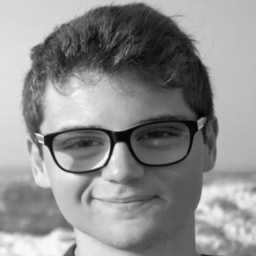

In [50]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.2989,0.5870,0.1140])


imgTeste = Image.open("dias.jpg")
data = np.asarray(imgTeste)/255
if(len(data.shape)>2):
    data = rgb2gray(data)
img =  Image.fromarray((data*255).astype('uint8'))
img2CNN =  data.reshape(1, 256, 256, 1)
img

In [51]:
#previsão da rede simplificada
model.predict(img2CNN)

array([[26.123446]], dtype=float32)

In [53]:
#previsão da rede resNet50
resnet.predict(img2CNN)

array([[30.686602]], dtype=float32)